In [1]:
import qsharp
from PhaseEstimation import run
import matplotlib.pyplot as plt
import numpy as np
n_shots = 10
phi = 0
n_oracle = 1

#test pour verifier que ca compile
result = run.simulate(nShots=n_shots, phi=phi, oraclePower=n_oracle)
print(result)


Preparing Q# environment...
.(4, 6)


L'objectif de cette analyse est d'étudier la précision des résultats obtenus pour différentes valeurs de n_shots et n_oracles dans un processus d'estimation de phase.

# Representation graphique
Faisons varier n_shot pour voir l'effet sur la precision de la mesure


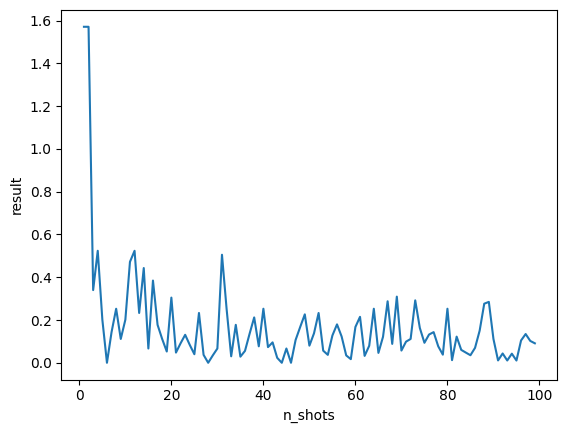

In [20]:
n_shots = []
for i in range(1, 100):
    n_shots.append(i)

result = []
for n in n_shots:
    result.append(run.simulate(nShots=n, phi=phi, oraclePower=n_oracle))

p = [result[i][1]/n_shots[i] for i in range(len(result))]
 
phi_mesure = [2/n_oracle * (np.arcsin(np.sqrt(p[i])) - np.pi/4) for i in range(len(p))]

#calcul valeur absolue phi - phi_mesure
res = [np.abs(phi - phi_mesure[i]) for i in range(len(phi_mesure))]

plt.plot(n_shots, res)
plt.xlabel("n_shots")
plt.ylabel("result")
plt.show()


Faisons varier n_oracle pour voir la precision sur la mesure

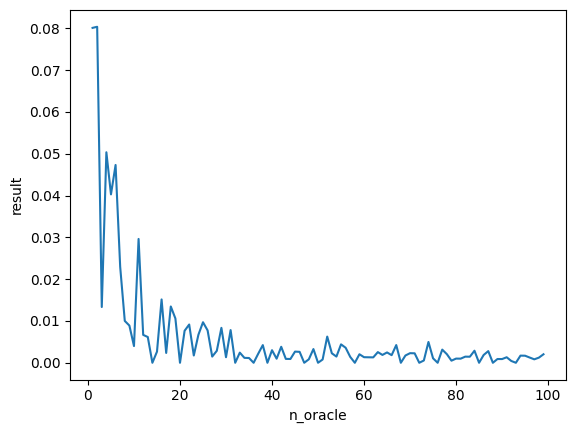

In [3]:
n_shots = 50  #fixe suffisament elevé pour avoir une bonne precision
n_oracles = list(range(1, 100))

res = []

for n_oracle in n_oracles:
    result = run.simulate(nShots=n_shots, phi=phi, oraclePower=n_oracle)
    p = result[1] / n_shots
    phi_mesure = 2 / n_oracle * (np.arcsin(np.sqrt(p)) - np.pi / 4)
    res.append(np.abs(phi - phi_mesure))

plt.plot(n_oracles, res)
plt.xlabel("n_oracle")
plt.ylabel("result")
plt.show()

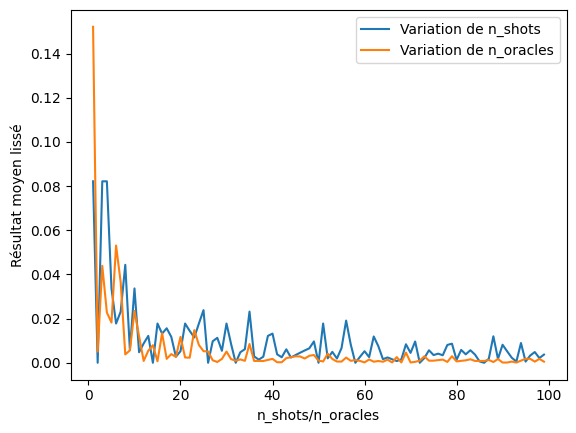

In [5]:
n_shots = list(range(1, 100))
n_oracles = list(range(1, 100))

res_n_shots = []
res_n_oracles = []

for n_shot in n_shots:
    result = run.simulate(nShots=n_shot, phi=phi, oraclePower=n_oracle)
    p = result[1] / n_shot
    phi_mesure = [2 / n_oracle * (np.arcsin(np.sqrt(p)) - np.pi / 4) for n_oracle in n_oracles]
    res_n_shots.append([np.abs(phi - phi_mes) for phi_mes in phi_mesure])

for n_oracle in n_oracles:
    result = run.simulate(nShots=n_shots[-1], phi=phi, oraclePower=n_oracle)
    p = result[1] / n_shots[-1]
    phi_mesure = [2 / n_oracle * (np.arcsin(np.sqrt(p)) - np.pi / 4) for n_shot in n_shots]
    res_n_oracles.append([np.abs(phi - phi_mes) for phi_mes in phi_mesure])

res_n_shots = np.array(res_n_shots)
res_n_oracles = np.array(res_n_oracles)

smoothed_n_shots = np.mean(res_n_shots, axis=1)
smoothed_n_oracles = np.mean(res_n_oracles, axis=1)

plt.plot(n_shots, smoothed_n_shots, label='Variation de n_shots')
plt.plot(n_shots, smoothed_n_oracles, label='Variation de n_oracles')
plt.xlabel("n_shots/n_oracles")
plt.ylabel("Résultat moyen lissé")
plt.legend()
plt.show()

Ajustement de courbe

En utilisant des méthodes d'ajustement de courbe, appliquons un modèle de fonction a / x^b pour estimer les paramètres optimaux a et b.  Ces paramètres caractérisent la tendance générale des courbes en fonction de n_shots et n_oracles, ce qui nous permet de mieux comprendre la relation entre ces paramètres et la précision 

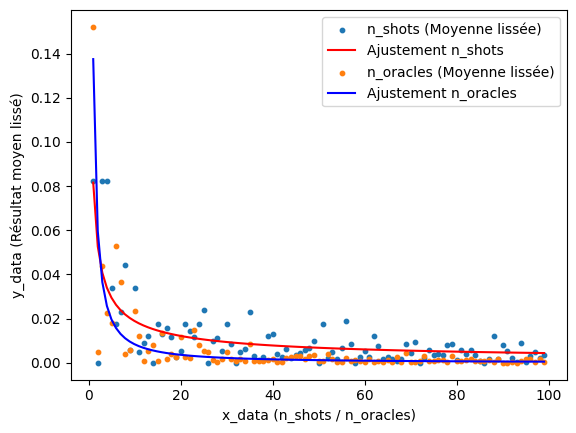

Paramètres optimaux pour n_shots : a = 0.08153444467766588, b = 0.6351569797987511
Paramètres optimaux pour n_oracles : a = 0.13746068814302004, b = 1.21484185503996


In [8]:
from scipy.optimize import curve_fit

# Supposons que vous ayez déjà calculé les moyennes lissées res_n_shots et res_n_oracles à partir des courbes précédentes

# Utilisation de n_shots comme x_data et la moyenne lissée correspondante comme y_data
x_data_shots = np.array(range(1, 100))  # n_shots varie de 1 à 99
y_data_shots = np.mean(res_n_shots, axis=1)  # Moyenne lissée des résultats pour n_shots

# Utilisation de n_oracles comme x_data et la moyenne lissée correspondante comme y_data
x_data_oracles = np.array(range(1, 100))  # n_oracles varie de 1 à 99
y_data_oracles = np.mean(res_n_oracles, axis=1)  # Moyenne lissée des résultats pour n_oracles

# Fonction modèle a / x^b
def power_inverse_model(x, a, b):
    return a / np.power(x, b)

# Ajustement de courbe pour n_shots
params_shots, _ = curve_fit(power_inverse_model, x_data_shots, y_data_shots)

# Récupération des paramètres a et b optimaux pour n_shots
a_optimal_shots, b_optimal_shots = params_shots

# Ajustement de courbe pour n_oracles
params_oracles, _ = curve_fit(power_inverse_model, x_data_oracles, y_data_oracles)

# Récupération des paramètres a et b optimaux pour n_oracles
a_optimal_oracles, b_optimal_oracles = params_oracles

# Création des courbes ajustées
x_fit_shots = np.linspace(min(x_data_shots), max(x_data_shots), 100)
y_fit_shots = power_inverse_model(x_fit_shots, a_optimal_shots, b_optimal_shots)

x_fit_oracles = np.linspace(min(x_data_oracles), max(x_data_oracles), 100)
y_fit_oracles = power_inverse_model(x_fit_oracles, a_optimal_oracles, b_optimal_oracles)

# Tracé des données et des courbes ajustées pour n_shots
plt.scatter(x_data_shots, y_data_shots, label='n_shots (Moyenne lissée)', s=10)
plt.plot(x_fit_shots, y_fit_shots, label='Ajustement n_shots', color='red')

# Tracé des données et des courbes ajustées pour n_oracles
plt.scatter(x_data_oracles, y_data_oracles, label='n_oracles (Moyenne lissée)', s=10)
plt.plot(x_fit_oracles, y_fit_oracles, label='Ajustement n_oracles', color='blue')

plt.xlabel('x_data (n_shots / n_oracles)')
plt.ylabel('y_data (Résultat moyen lissé)')
plt.legend()
plt.show()

print(f"Paramètres optimaux pour n_shots : a = {a_optimal_shots}, b = {b_optimal_shots}")
print(f"Paramètres optimaux pour n_oracles : a = {a_optimal_oracles}, b = {b_optimal_oracles}")

# Conclusion
En comparant les valeur de b, on deduit tres clairement que le parametre n_oracle permet de mieux converger.